In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
data = pd.read_csv('./data.csv')

In [3]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [12]:
from pprint import pprint


unique_data = {}
for column in data.columns:
    unique_data[column] =data[column].unique()
    
pprint(unique_data)

{'gender': array(['female', 'male'], dtype=object),
 'lunch': array(['standard', 'free/reduced'], dtype=object),
 'math_score': array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8]),
 'parental_level_of_education': array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object),
 'race_ethnicity': array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object),
 'reading_score': array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73, 

In [13]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [14]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [17]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(0)

In [20]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [23]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['avg_score'] = {data['total_score']/3}:2.2f

SyntaxError: invalid decimal literal (3816120664.py, line 2)

In [22]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
data['avg_score'] = round( data['avg_score'], 2 )

In [25]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


In [29]:
data[data['reading_score'] <= 20].count()

gender                         1
race_ethnicity                 1
parental_level_of_education    1
lunch                          1
test_preparation_course        1
math_score                     1
reading_score                  1
writing_score                  1
total_score                    1
avg_score                      1
dtype: int64

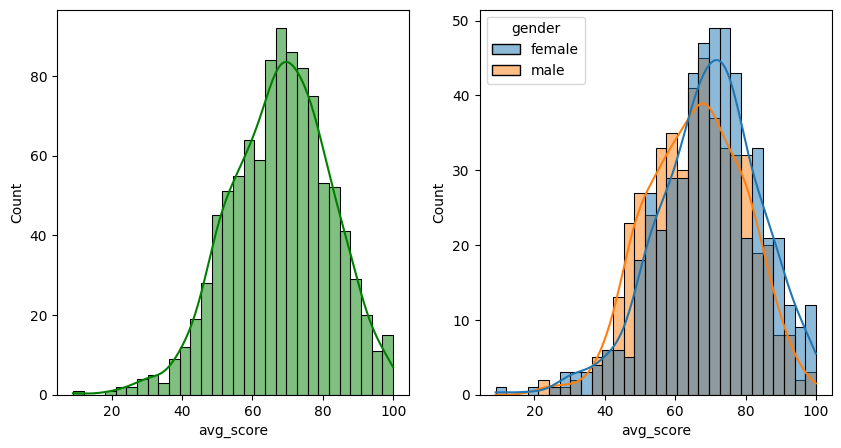

In [55]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data=data, x='avg_score', bins=30, kde=True, color='g', ax=ax[0])

sns.histplot(data=data, x='avg_score', bins=30, color='y', kde=True, ax=ax[1], hue='gender')
plt.show()

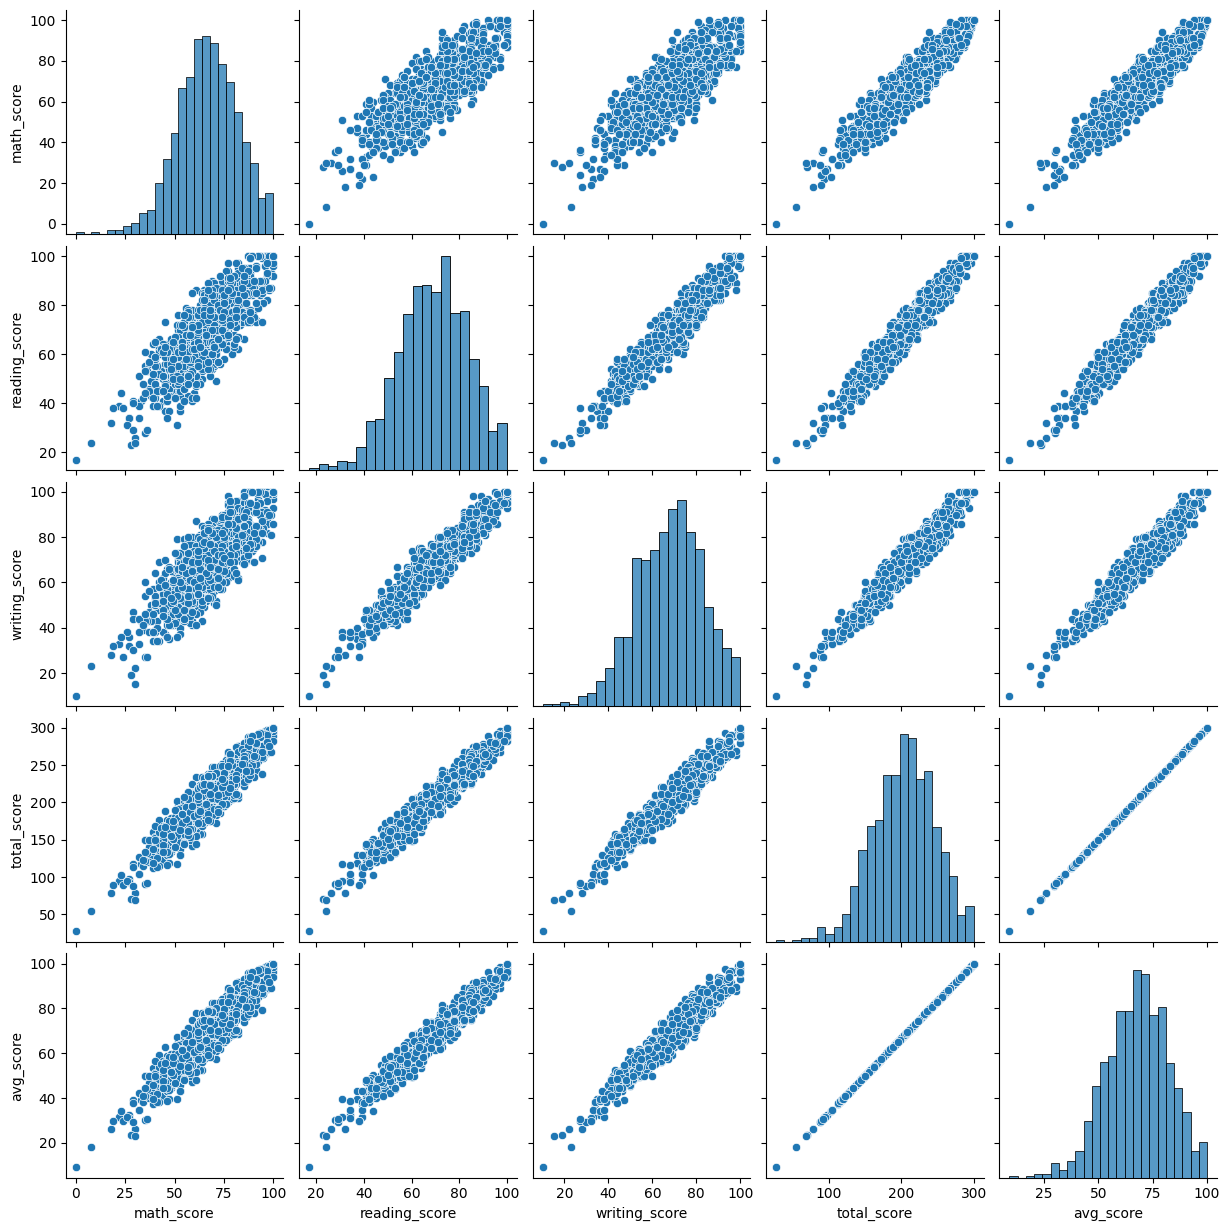

In [58]:
sns.pairplot(data)
plt.show()